### **Data Overview**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
%matplotlib inline

df = pd.read_csv('starbucks.csv')

# Display shape and info
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 
 9   Phone Number    18739 non-null  object 
 10  Timezone        25600 non-null  object 
 11  Longitude       25599 non-null  float64
 12  Latitude        25599 non-null  float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


### Univariate Analysis 

### Missing Values Overview

In [2]:
# Show missing values only
df.isnull().sum()[df.isnull().sum() > 0]

Street Address       2
City                15
Postcode          1522
Phone Number      6861
Longitude            1
Latitude             1
dtype: int64

### Handling Missing Values

In [3]:
# Drop rows with missing Latitude or Longitude (needed for location-based analysis)
df = df.dropna(subset=['Latitude', 'Longitude'])

# Fill missing City values with 'Unknown'
df['City'] = df['City'].fillna('Unknown')

# Drop Phone Number column due to high number of missing values (optional)
df = df.drop(columns=['Phone Number'])

# Optional: Fill missing Postcode with a placeholder
df['Postcode'] = df['Postcode'].fillna('00000')

### Checking and Removing Duplicated Rows

In [4]:
# Check for duplicated rows
df.duplicated().sum() 

0

In [5]:
# Remove duplicated rows
df = df.drop_duplicates()

### Summary Statistics for Numerical Columns

In [6]:
# Get numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_cols

# Summary statistics
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Longitude,25599.0,-27.872234,96.844046,-159.46,-104.665,-79.35,100.63,176.92
Latitude,25599.0,34.793016,13.342332,-46.41,31.240,36.75,41.57,64.85


### Distribution and Skewness of Numerical Variables

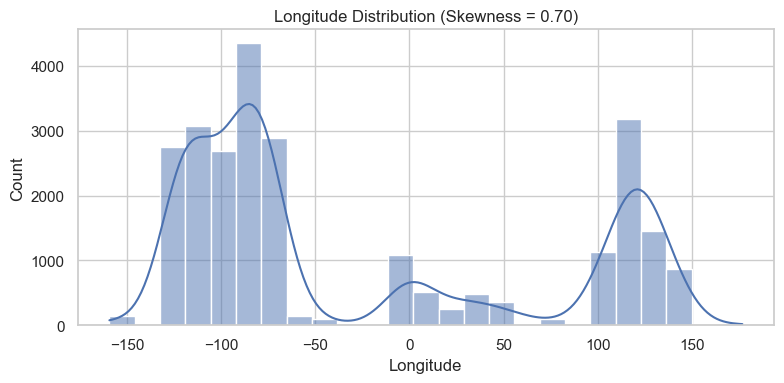

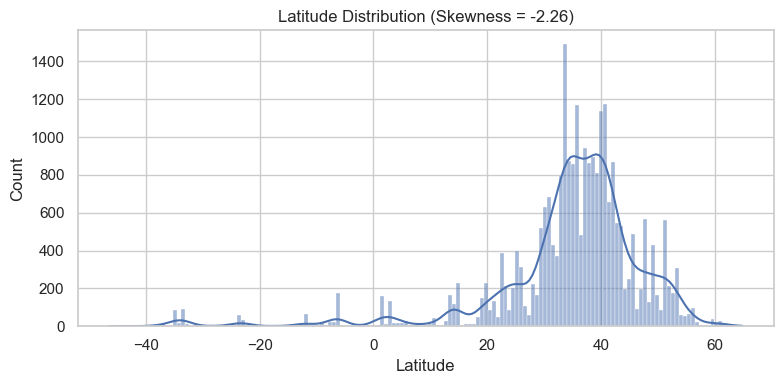

In [7]:
# Histogram + skewness
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution (Skewness = {df[col].skew():.2f})")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

### Outlier Detection using Boxplots

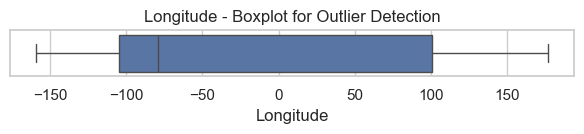

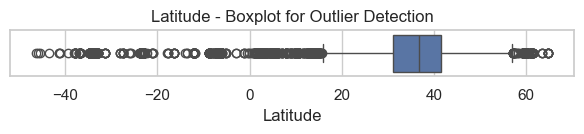

In [8]:
# Boxplot for each numerical column
for col in num_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f"{col} - Boxplot for Outlier Detection")
    plt.tight_layout()
    plt.show()

### Removing Outliers using IQR Method

In [9]:
# Remove outliers using IQR and print number of outliers removed
for col in ['Longitude', 'Latitude']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} - Outliers removed: {len(outliers)}")
    df = df[(df[col] >= lower) & (df[col] <= upper)]

Longitude - Outliers removed: 0
Latitude - Outliers removed: 1858


### Correlation Analysis for Numerical Features

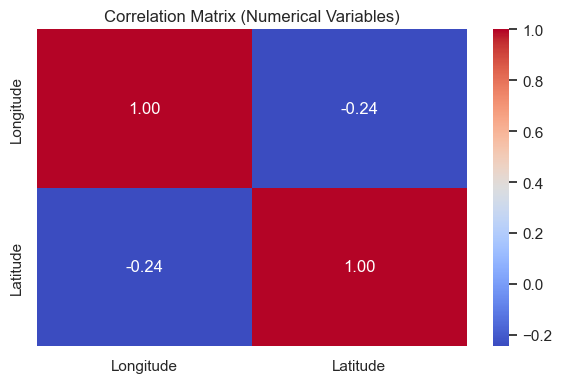

In [10]:
# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Display correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numerical Variables)")
plt.tight_layout()
plt.show()

### Univariate Analysis for Categorical Features

In [11]:
# Value counts for categorical columns (top 10)
cat_cols = ['Brand', 'Ownership Type', 'Country', 'City']

for col in cat_cols:
    print(f"\nTop 10 values for {col}:")
    display(df[col].value_counts().head(10))


Top 10 values for Brand:


Brand
Starbucks                23391
Teavana                    347
Evolution Fresh              2
Coffee House Holdings        1
Name: count, dtype: int64


Top 10 values for Ownership Type:


Ownership Type
Company Owned    11414
Licensed          8073
Joint Venture     3937
Franchise          317
Name: count, dtype: int64


Top 10 values for Country:


Country
US    13560
CN     2734
CA     1466
JP     1237
KR      992
GB      891
MX      579
TW      394
TR      326
DE      160
Name: count, dtype: int64


Top 10 values for City:


City
上海市            542
Seoul          242
北京市            234
New York       232
London         216
Toronto        192
Chicago        180
Mexico City    180
Las Vegas      156
Seattle        156
Name: count, dtype: int64

### **Bivariate Analysis**

### Define Numerical and Categorical Columns for Bivariate Analysis

In [12]:
# Select useful numerical and categorical columns for bivariate analysis
num_cols = ['Longitude', 'Latitude']
cat_cols = ['Country', 'Ownership Type', 'Brand']

### Bivariate Analysis: Correlation Between Numerical Variables

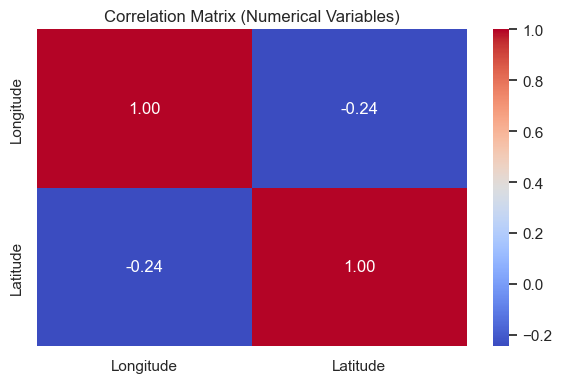

In [13]:
# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Display correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numerical Variables)")
plt.tight_layout()
plt.show()

### Store Locations by Ownership Type

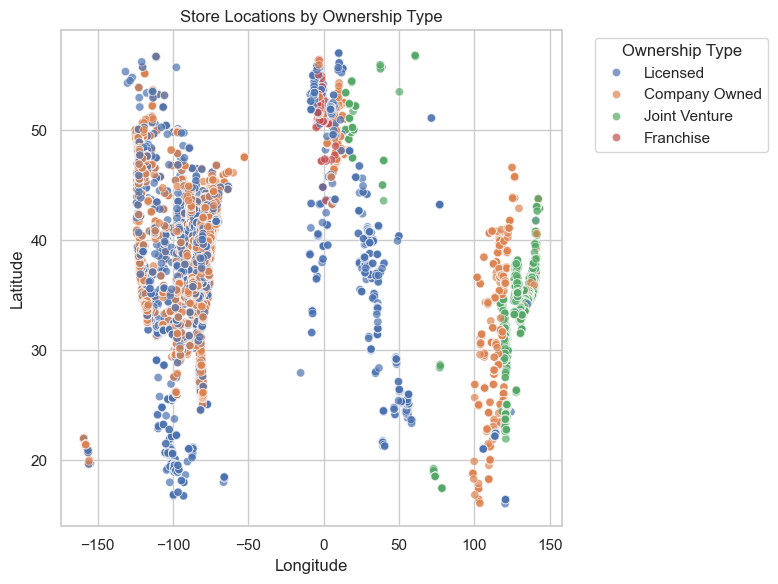

In [14]:
# Scatter plot to show spatial distribution
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Ownership Type', alpha=0.7)
plt.title("Store Locations by Ownership Type")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Ownership Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Bivariate Analysis: Geographical Distribution by Country

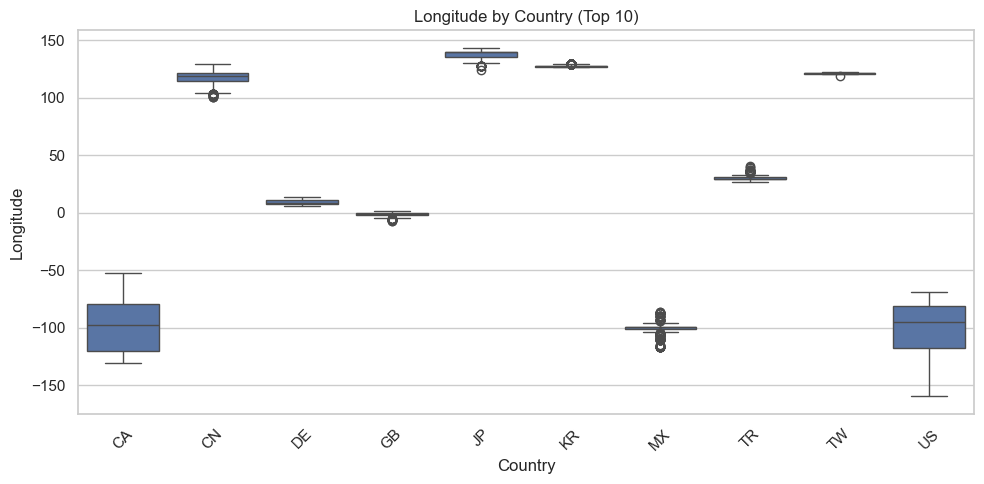

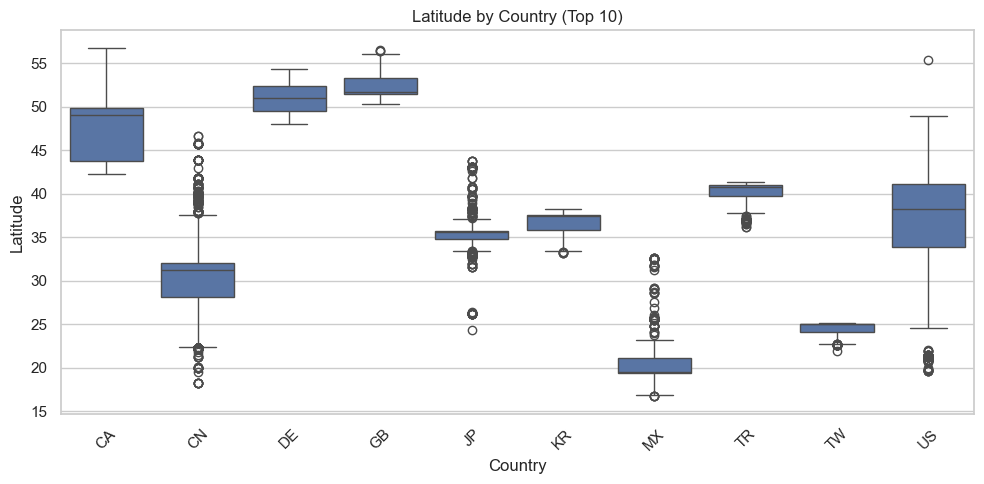

In [15]:
# Limit to top 10 countries
top_countries = df['Country'].value_counts().head(10).index
filtered_df = df[df['Country'].isin(top_countries)]

# Longitude by Country
plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_df, x='Country', y='Longitude')
plt.title("Longitude by Country (Top 10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Latitude by Country
plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_df, x='Country', y='Latitude')
plt.title("Latitude by Country (Top 10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Bivariate Analysis: Ownership Type Distribution by Country

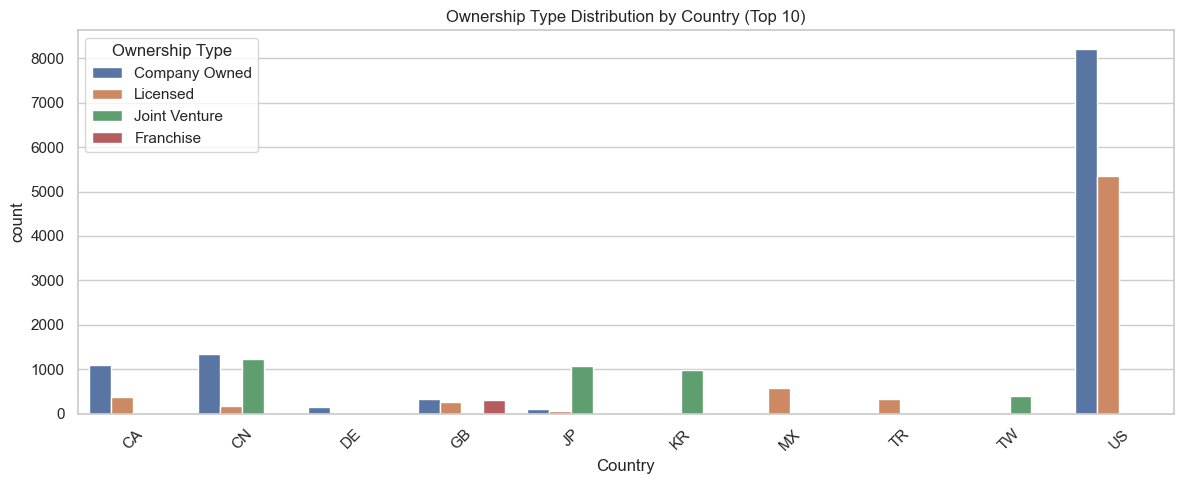

In [16]:
# Stacked bar chart to see ownership type distribution by country
plt.figure(figsize=(12, 5))
sns.countplot(data=filtered_df, x='Country', hue='Ownership Type')
plt.title("Ownership Type Distribution by Country (Top 10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**For handling outliers: No extreme outliers remain after prior cleaning steps using the IQR method.**

### **Multivariate Analysis**
Before proceeding with multivariate analysis, it's important to note that the dataset has already been cleaned:

- Duplicate records have been removed.
- Missing values have been identified and handled appropriately.
- Outliers in **Latitude** and **Longitude** were removed using the IQR method.
- Any remaining "outliers" visible in spatial plots are expected, as they reflect the global distribution of Starbucks locations.

### Pairwise Plot of Numerical Variables

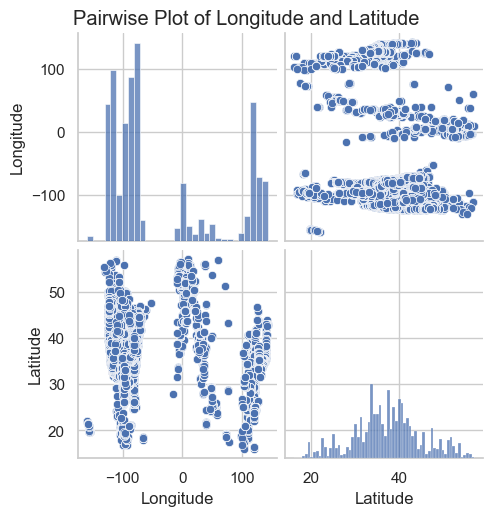

In [17]:
# Pairplot of numerical variables
sns.pairplot(df[['Longitude', 'Latitude']])
plt.suptitle("Pairwise Plot of Longitude and Latitude", y=1.02)
plt.show()

### Aggregated Coordinates by Country and Ownership Type

In [18]:
# Group by Country and Ownership Type and aggregate coordinates
grouped = df.groupby(['Country', 'Ownership Type'])[['Longitude', 'Latitude']].mean().reset_index()

# Show grouped results
grouped.head()

,Country,Ownership Type,Longitude,Latitude
0,AD,Licensed,1.530000,42.510000
1,AE,Licensed,55.130903,24.918750
2,AT,Company Owned,15.780000,48.133529
3,AT,Licensed,16.560000,48.130000
4,AZ,Licensed,49.615000,40.277500


### Bubble Plot of Mean Store Locations

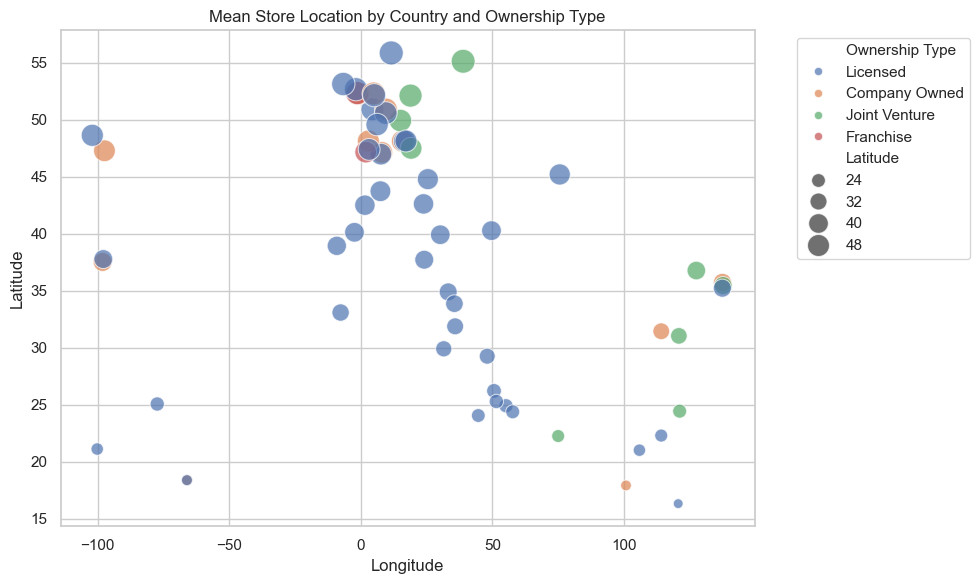

In [19]:
# Bubble plot (mean location)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=grouped,
    x='Longitude',
    y='Latitude',
    size='Latitude',
    hue='Ownership Type',
    alpha=0.7,
    sizes=(50, 300)
)
plt.title("Mean Store Location by Country and Ownership Type")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Latitude Distribution by Country and Ownership Type

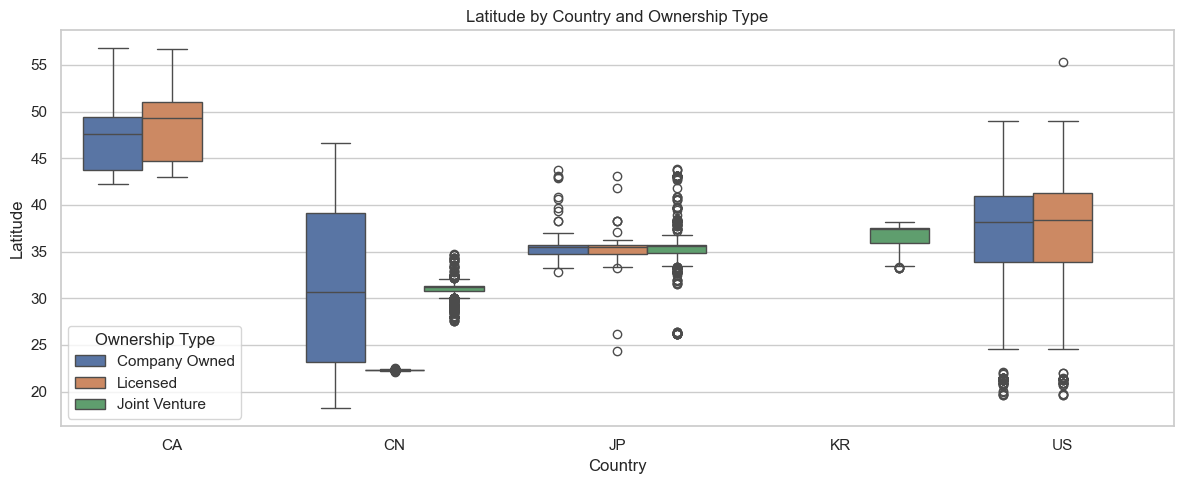

In [20]:
# Filter again to top countries
top_countries = df['Country'].value_counts().head(5).index
filtered_df = df[df['Country'].isin(top_countries)]

# Boxplot of Latitude by Country and Ownership Type
plt.figure(figsize=(12, 5))
sns.boxplot(data=filtered_df, x='Country', y='Latitude', hue='Ownership Type')
plt.title("Latitude by Country and Ownership Type")
plt.tight_layout()
plt.show()

### Store Distribution by Ownership Type

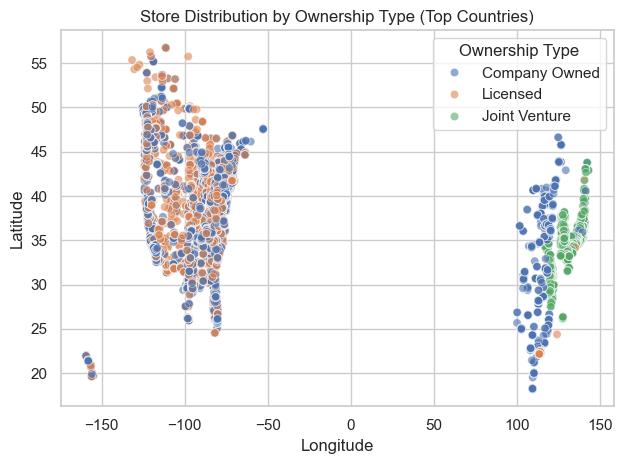

In [21]:
# Joint distribution with Ownership hue
sns.scatterplot(data=filtered_df, x='Longitude', y='Latitude', hue='Ownership Type', alpha=0.6)
plt.title("Store Distribution by Ownership Type (Top Countries)")
plt.tight_layout()
plt.show()

### Supporting Analysis: Latitude Skewness by Country

In [22]:
# Check skewness of latitude per country
for country in top_countries:
    skew_value = df[df['Country'] == country]['Latitude'].skew()
    print(f"{country}: Latitude skewness = {skew_value:.2f}")

US: Latitude skewness = -0.25
CN: Latitude skewness = 0.20
CA: Latitude skewness = 0.19
JP: Latitude skewness = -0.00
KR: Latitude skewness = -1.03


### **Key Questions**

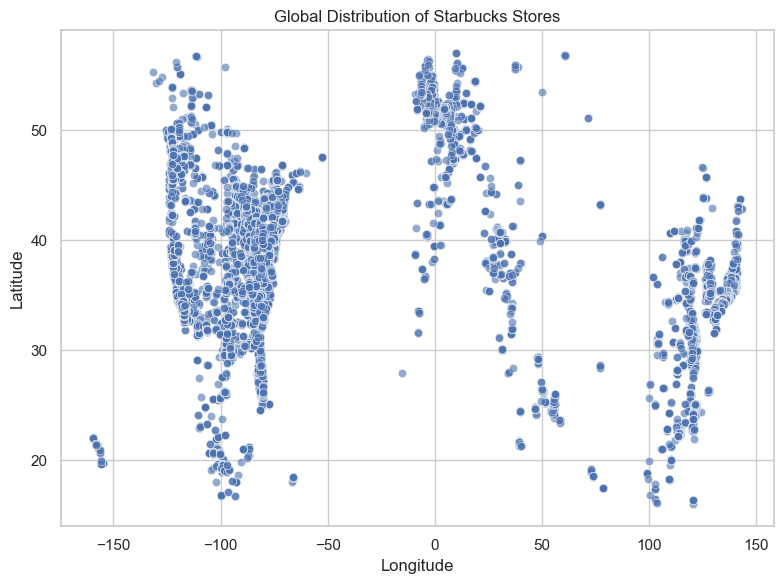

In [23]:
# 1. Where are Starbucks stores located around the world and what is their geographical distribution?
# This scatter plot shows the global distribution of Starbucks stores. 
# Most stores are concentrated in North America and Asia. 
# The largest clusters of stores are in the United States and China.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', alpha=0.6)
plt.title("Global Distribution of Starbucks Stores")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

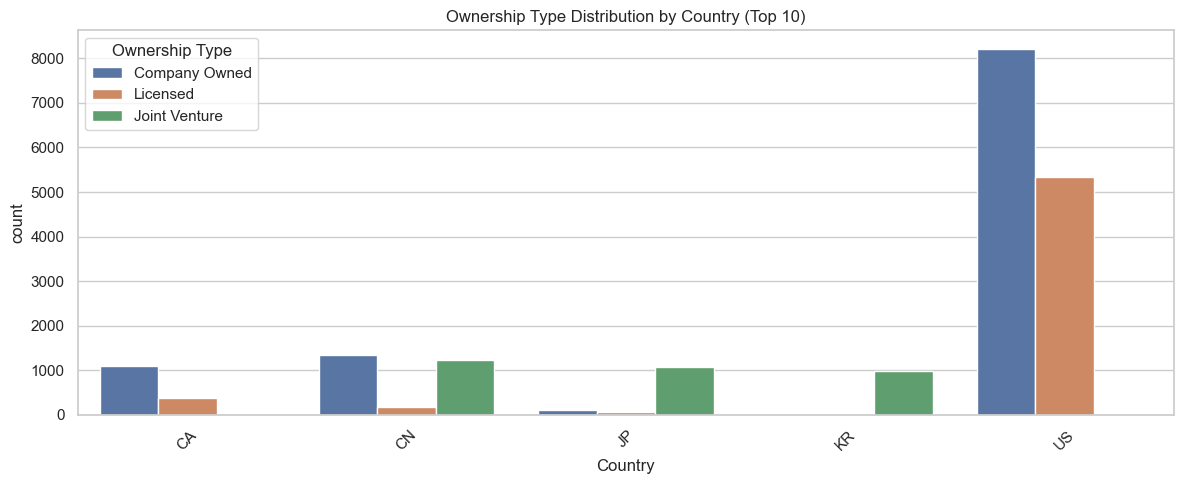

In [24]:
# 2. How do store ownership types vary across countries?
# This count chart compares ownership types across countries. 
# The United States is dominated by company-owned and licensed stores, 
# while joint ventures are common in Asian countries such as China and South Korea.
plt.figure(figsize=(12, 5))
sns.countplot(data=filtered_df, x='Country', hue='Ownership Type')
plt.title("Ownership Type Distribution by Country (Top 10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

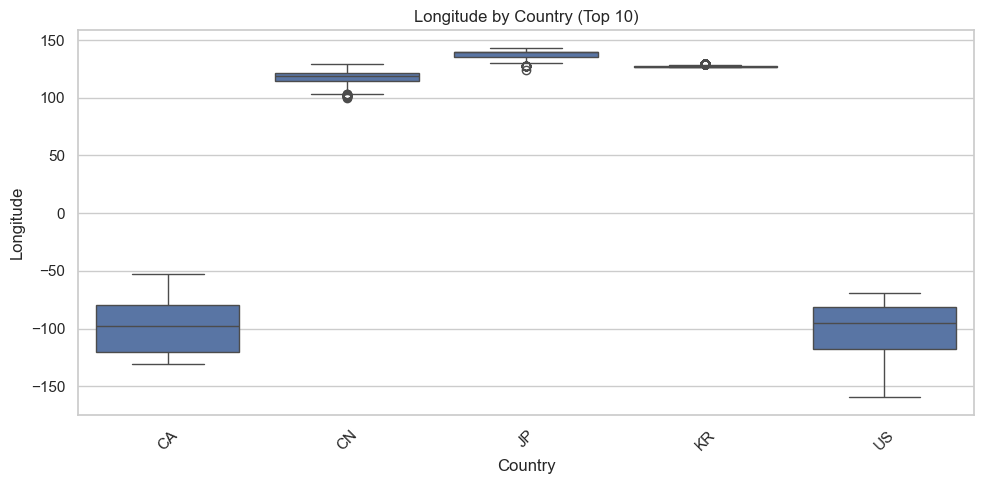

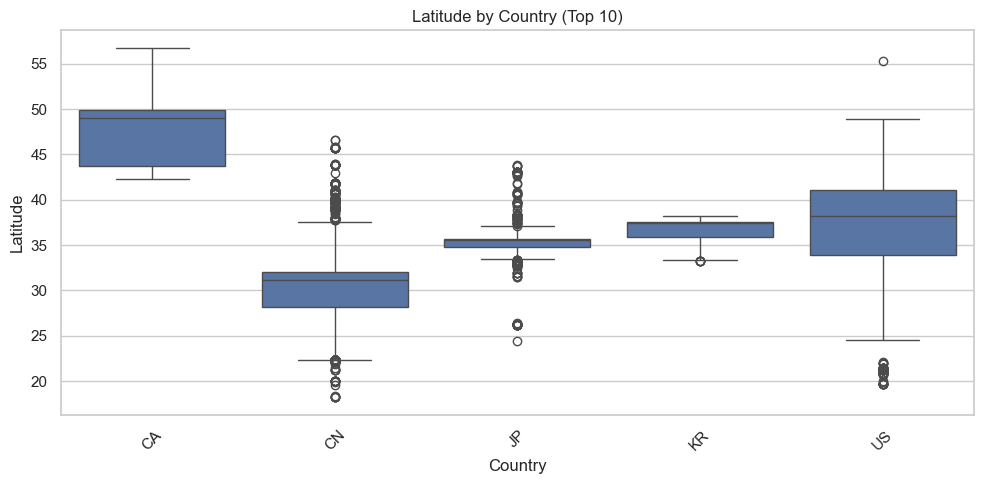

In [25]:
# 3. What is the typical geographical distribution (latitude and longitude) of stores in different countries?
# These boxplots show the geographic range of each country. 
# The United States and Canada are widely distributed, 
# while Japan and South Korea are more tightly distributed.

# Longitude
plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_df, x='Country', y='Longitude')
plt.title("Longitude by Country (Top 10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Latitude
plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_df, x='Country', y='Latitude')
plt.title("Latitude by Country (Top 10)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

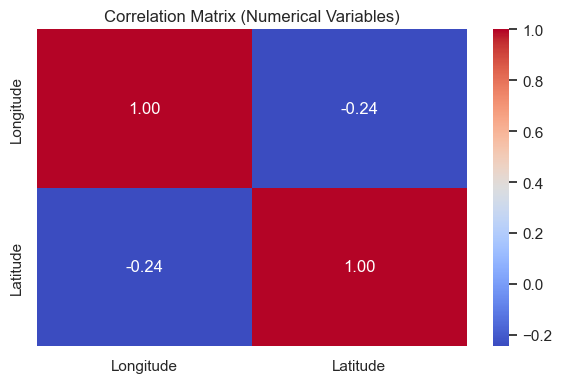

In [26]:
# 4. What does the correlation between latitude and longitude tell us about spatial patterns?
# The correlation between latitude and longitude is weakly negative (-0.24), 
# indicating mild regional spatial trends, 
# such as east-west clustering of stores.
corr_matrix = df[['Longitude', 'Latitude']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix (Numerical Variables)")
plt.tight_layout()
plt.show()